# Modelos de clasificación clásico y redes neuronales profundas

In [1]:
#Librerias étiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#Procesamiento de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#Evaluacion
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

### Análisis y acondicionamiento del dataset

In [2]:
#Se importa el dataset en un dataframe
df_train=pd.read_csv('Train.csv')
#df_test=pd.read_csv('Test.csv')

In [3]:
#Se muestra la información de los atributos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
#Se muestran las primeras instancias del dataframe
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
#Se suman los valores nulos por atributo
df_train.isna().sum(axis=0)

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
#Se sustituyen los valores númericos por la media del atributo al que pertenece
df_train.fillna(df_train.mean(), inplace = True)

In [7]:
#Se eliminan las instancias con valores nulos restantes
df_train.dropna(axis=0, inplace=True)

In [8]:
#Se obtienen estadísticas del dataset
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,7669.0,NaN,NaN,NaN,463473.811579,2590.836382,458982.0,461263.0,463453.0,465715.0,467974.0
Gender,7669,2,Male,4217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ever_Married,7669,2,Yes,4492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,7669.0,NaN,NaN,NaN,43.508541,16.68933,18.0,31.0,40.0,53.0,89.0
Graduated,7669,2,Yes,4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,7669,9,Artist,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Experience,7669.0,NaN,NaN,NaN,2.636749,3.234815,0.0,0.0,1.0,4.0,14.0
Spending_Score,7669,3,Low,4645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,7669.0,NaN,NaN,NaN,2.847449,1.49857,1.0,2.0,2.850123,4.0,9.0
Var_1,7669,7,Cat_6,5088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


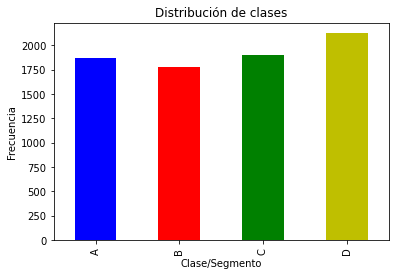

In [9]:
#Se obtiene la distribución por clases
(df_train.groupby('Segmentation').size()).plot(kind='bar',color=['b','r','g','y'])
plt.xlabel('Clase/Segmento')
plt.ylabel('Frecuencia')
plt.title('Distribución de clases')
plt.show()

In [10]:
#Se separa el conjunto de datos en entrenamiento y prueba. Se observan las dimensiones de los nuevos conjuntos
Xc=df_train.iloc[:,1:-1]
yc=df_train.iloc[:,-1]
Xc_train,Xc_test,yc_train,yc_test = train_test_split(Xc,yc,test_size=0.2,random_state=1)
Xc_train.shape,Xc_test.shape,yc_train.shape,yc_test.shape

((6135, 9), (1534, 9), (6135,), (1534,))

In [11]:
#Se recodifican las entradas a valores numéricos eliminando el primer nuevo atributo generado por cada atributo original
Xc_train=pd.get_dummies(Xc_train, drop_first=True)
Xc_test=pd.get_dummies(Xc_test, drop_first=True)

In [12]:
#Se realiza un escalamiento a los atributos de entrada
mms=MinMaxScaler()
Xc_train_esc=mms.fit_transform(Xc_train)
Xc_test_esc=mms.fit_transform(Xc_test)

## Regresión logística

In [13]:
#Se define el modelo, se entrena, y se hacen predicciones a partir de los conjuntos de entrenamiento y prueba
clr=LogisticRegression(max_iter=1000)
clr.fit(Xc_train_esc,yc_train)
yc_clr_pred_train=clr.predict(Xc_train_esc)
yc_clr_pred_test=clr.predict(Xc_test_esc)

In [14]:
#Se muestran los valores de precisiones de los modelos a partir de los conjuntos de entrenamiento y prueba
acc_clr_train = accuracy_score(yc_train, yc_clr_pred_train)
print('Precisión entrenamiento: ',acc_clr_train)
acc_clr_test = accuracy_score(yc_test, yc_clr_pred_test)
print('Precisión prueba: ',acc_clr_test)

Precisión entrenamiento:  0.5251833740831295
Precisión prueba:  0.4954367666232073


In [15]:
#Se muestran los valores de clasificación de entrenamiento y prueba
print('Entrenamiento\n', classification_report(yc_train,yc_clr_pred_train,zero_division=True))
print('Prueba\n', classification_report(yc_test,yc_clr_pred_test,zero_division=True))

Entrenamiento
               precision    recall  f1-score   support

           A       0.43      0.49      0.46      1478
           B       0.40      0.23      0.29      1419
           C       0.53      0.63      0.58      1541
           D       0.66      0.71      0.68      1697

    accuracy                           0.53      6135
   macro avg       0.51      0.51      0.50      6135
weighted avg       0.51      0.53      0.51      6135

Prueba
               precision    recall  f1-score   support

           A       0.41      0.47      0.44       389
           B       0.39      0.21      0.27       360
           C       0.45      0.60      0.52       355
           D       0.67      0.68      0.68       430

    accuracy                           0.50      1534
   macro avg       0.48      0.49      0.47      1534
weighted avg       0.49      0.50      0.48      1534



In [16]:
#Se muestra matriz de confusión con valores predichos por el modelo a partir del conjunto de prueba
print('Matriz de confusión entrada de prueba \n',confusion_matrix(yc_test,yc_clr_pred_test))

Matriz de confusión entrada de prueba 
 [[181  53  85  70]
 [106  74 145  35]
 [ 60  45 214  36]
 [ 92  19  28 291]]


## KNN

In [17]:
#De manera adicional se somete el conjunto de datos a la técnica de KNN
knn=KNeighborsClassifier(1000)
knn.fit(Xc_train_esc,yc_train)
yc_knn_pred_train=knn.predict(Xc_train_esc)
yc_knn_pred_test=knn.predict(Xc_test_esc)

In [18]:
#Se obtienen las precisiones de los conjuntos
acc_knn_train = accuracy_score(yc_train, yc_knn_pred_train)
print('Precisión entrenamiento: ',acc_knn_train)
acc_knn_test = accuracy_score(yc_test, yc_knn_pred_test)
print('Precisión prueba: ',acc_knn_test)

Precisión entrenamiento:  0.46422167889160554
Precisión prueba:  0.44132985658409385


In [19]:
#Se muestran los valores de clasificación del modelo
print('Entrenamiento\n', classification_report(yc_train,yc_knn_pred_train,zero_division=True))
print('Prueba\n', classification_report(yc_test,yc_knn_pred_test,zero_division=True))

Entrenamiento
               precision    recall  f1-score   support

           A       0.41      0.35      0.38      1478
           B       0.29      0.03      0.05      1419
           C       0.39      0.78      0.52      1541
           D       0.65      0.64      0.65      1697

    accuracy                           0.46      6135
   macro avg       0.44      0.45      0.40      6135
weighted avg       0.44      0.46      0.41      6135

Prueba
               precision    recall  f1-score   support

           A       0.42      0.35      0.38       389
           B       0.24      0.03      0.05       360
           C       0.36      0.79      0.49       355
           D       0.65      0.59      0.62       430

    accuracy                           0.44      1534
   macro avg       0.42      0.44      0.39      1534
weighted avg       0.43      0.44      0.40      1534



In [20]:
#Se muestra la matriz de confusión con los valores predichos a partir del conjunto de prueba
print('Matriz de confusión entrada de prueba \n',confusion_matrix(yc_test,yc_knn_pred_test))

Matriz de confusión entrada de prueba 
 [[135  19 174  61]
 [ 61  11 250  38]
 [ 39   0 279  37]
 [ 90  15  73 252]]


## Clasificación Red Neuronal

In [21]:
#Librerias para modelar red neuronal
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [22]:
#Se define el modelo de la red con dos capas intermedias
model_crn = Sequential([
    Dense(32, activation='relu',input_shape=[Xc_train.shape[1]]),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
    ])

model_crn.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [23]:
#Se muestra el resumen de la red neuronal
model_crn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                736       
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 13,476
Trainable params: 13,476
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Se recodifican las salidas a valores numéricos
yc_train_enc=pd.get_dummies(yc_train)
yc_test_enc=pd.get_dummies(yc_test)

In [25]:
#Se entrena el modelo de clasificación de Red Neuronal
model_crn.fit(Xc_train_esc,yc_train_enc,epochs=100,verbose=1)

Epoch 1/100
192/192 [==============================] - 2s 3ms/step - loss: 1.1790 - accuracy: 0.4771
Epoch 2/100
192/192 [==============================] - 1s 3ms/step - loss: 1.1015 - accuracy: 0.5152
Epoch 3/100
192/192 [==============================] - 1s 3ms/step - loss: 1.0785 - accuracy: 0.5335
Epoch 4/100
192/192 [==============================] - 1s 3ms/step - loss: 1.0651 - accuracy: 0.5369
Epoch 5/100
192/192 [==============================] - 1s 4ms/step - loss: 1.0561 - accuracy: 0.5410
Epoch 6/100
192/192 [==============================] - 1s 3ms/step - loss: 1.0484 - accuracy: 0.5464
Epoch 7/100
192/192 [==============================] - 1s 3ms/step - loss: 1.0386 - accuracy: 0.5509
Epoch 8/100
192/192 [==============================] - 1s 4ms/step - loss: 1.0320 - accuracy: 0.5509
Epoch 9/100
192/192 [==============================] - 1s 4ms/step - loss: 1.0253 - accuracy: 0.5612
Epoch 10/100
192/192 [==============================] - 1s 3ms/step - loss: 1.0216 - accura

192/192 [==============================] - 1s 3ms/step - loss: 0.7708 - accuracy: 0.6696
Epoch 82/100
192/192 [==============================] - 1s 3ms/step - loss: 0.7662 - accuracy: 0.6709
Epoch 83/100
192/192 [==============================] - 1s 3ms/step - loss: 0.7571 - accuracy: 0.6727
Epoch 84/100
192/192 [==============================] - 1s 5ms/step - loss: 0.7601 - accuracy: 0.6709
Epoch 85/100
192/192 [==============================] - 1s 3ms/step - loss: 0.7581 - accuracy: 0.6706
Epoch 86/100
192/192 [==============================] - 1s 3ms/step - loss: 0.7545 - accuracy: 0.6753
Epoch 87/100
192/192 [==============================] - 1s 3ms/step - loss: 0.7477 - accuracy: 0.6753
Epoch 88/100
192/192 [==============================] - 1s 3ms/step - loss: 0.7473 - accuracy: 0.6782
Epoch 89/100
192/192 [==============================] - 1s 3ms/step - loss: 0.7456 - accuracy: 0.6795
Epoch 90/100
192/192 [==============================] - 1s 3ms/step - loss: 0.7422 - accuracy: 

In [26]:
#Se muestran las precisiones alcanzadas por el modelo a partir de los datos de entrenamiento y prueba
train_loss, acc_crn_train = model_crn.evaluate(Xc_train_esc,  yc_train_enc, verbose=2)
print('\nPrecisión de entrenamiento:', acc_crn_train)

test_loss, acc_crn_test = model_crn.evaluate(Xc_test_esc,  yc_test_enc, verbose=2)
print('\nPrecisión de prueba:', acc_crn_test)

192/192 - 1s - loss: 0.7021 - accuracy: 0.7042 - 744ms/epoch - 4ms/step

Precisión de entrenamiento: 0.7041564583778381
48/48 - 0s - loss: 1.4423 - accuracy: 0.4739 - 190ms/epoch - 4ms/step

Precisión de prueba: 0.4739243686199188


In [27]:
#El modelo predice valores a partir de los datos de entrenamiento y prueba
yc_crn_pred_train=model_crn.predict(Xc_train_esc)
yc_crn_pred_test=model_crn.predict(Xc_test_esc)

48/48 [==============================] - 0s 2ms/step


In [28]:
#Se muestran los valores de clasificación del modelo
print('Entrenamiento RN \n',classification_report(yc_train_enc.values.argmax(axis=1),yc_crn_pred_train.argmax(axis=1),zero_division=True))
print('Prueba RN \n',classification_report(yc_test_enc.values.argmax(axis=1),yc_crn_pred_test.argmax(axis=1),zero_division=True))

Entrenamiento RN 
               precision    recall  f1-score   support

           0       0.73      0.61      0.66      1478
           1       0.57      0.68      0.62      1419
           2       0.69      0.70      0.70      1541
           3       0.83      0.81      0.82      1697

    accuracy                           0.70      6135
   macro avg       0.71      0.70      0.70      6135
weighted avg       0.71      0.70      0.71      6135

Prueba RN 
               precision    recall  f1-score   support

           0       0.41      0.31      0.35       389
           1       0.35      0.46      0.39       360
           2       0.48      0.50      0.49       355
           3       0.68      0.61      0.64       430

    accuracy                           0.47      1534
   macro avg       0.48      0.47      0.47      1534
weighted avg       0.48      0.47      0.48      1534



In [29]:
#Matriz de confusión de valores de prueba y predichos por el modelo
print('Matriz de confusión Red Neuronal. Datos de prueba \n',confusion_matrix(yc_test_enc.values.argmax(axis=1),yc_crn_pred_test.argmax(axis=1)))

Matriz de confusión Red Neuronal. Datos de prueba 
 [[119 147  60  63]
 [ 59 165 109  27]
 [ 28 113 179  35]
 [ 87  52  27 264]]


## Evaluación comparativa del desempeño

In [30]:
#Se muestra una tabla comparativa con los valores de precisión de los modelos a partir de los datos de prueba
df_cla_acc=pd.DataFrame({'Acc Regr Logi':[acc_clr_test],'Acc KNN':[acc_knn_test],'Acc DNN':[acc_crn_test]})
df_cla_acc

,Acc Regr Logi,Acc KNN,Acc DNN
0,0.495437,0.44133,0.473924


In [31]:
#Se genera y muestra un DataFrame con los valores de las predicciones hechos por regresión lineal y con red neuronal
df_clas_pred=yc_test_enc.copy()
df_clas_pred['RL Clase Pred']=yc_clr_pred_test
df_clas_pred['KNN Clase Pred']=yc_knn_pred_test
df_clas_pred['RN DL Clase Pred']=yc_test_enc.columns[yc_crn_pred_test.argmax(axis=1)]
df_clas_pred.sample(8)

,A,B,C,D,RL Clase Pred,KNN Clase Pred,RN DL Clase Pred
1654,0,0,0,1,A,A,A
4736,0,1,0,0,C,C,C
2809,1,0,0,0,C,C,C
668,0,0,0,1,C,A,B
103,1,0,0,0,B,C,B
194,0,0,1,0,A,C,B
360,1,0,0,0,C,A,C
86,0,0,1,0,C,C,C
